# Example of data augmentations

In [155]:
import pandas as pd 
import cv2 # pip install opencv-python 
import numpy as np 
import sklearn 
import skimage # pip install scikit-image
from matplotlib import pyplot as plt
from skimage.transform import rotate
from skimage.util import random_noise
import random
from skimage.transform import warp, AffineTransform

In [99]:
train = pd.read_csv('./train.csv')
train.head()

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2


In [100]:
train = train.iloc[:,3:].values.reshape(-1,28,28).astype(np.float32)  
train /= 255.0 # normalize 

# Original image

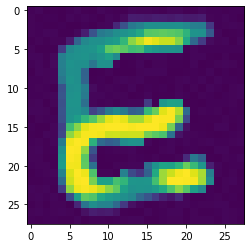

In [240]:
sample = train[1000]
plt.imshow(sample)

# Rotation

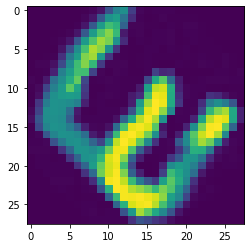

In [102]:
# anti-clockwise rotation 
rotated_img = rotate(sample,angle = 45)
plt.imshow(rotated_img)

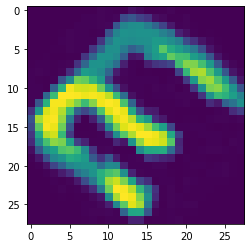

In [103]:
# clockwise rotation 
rotated_img = rotate(sample, angle = -45) 
plt.imshow(rotated_img)

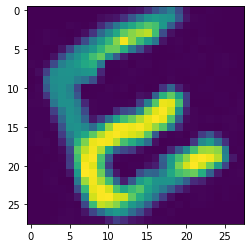

In [105]:
# random rotation 
rotated_img = rotate(sample, angle = random.randint(10,40)) 
plt.imshow(rotated_img)

# Adding noise

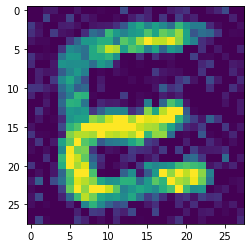

In [107]:
noised = random_noise(sample)
plt.imshow(noised)

# Adding Gaussian Blur

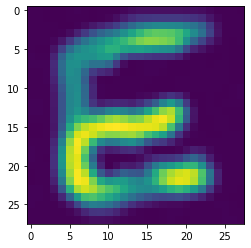

In [154]:
kernel_size = random.choice([3,5,9]) 
blurred = cv2.GaussianBlur(sample, (kernel_size, kernel_size), 0)
plt.imshow(blurred)

# Shifting Image

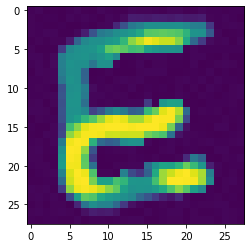

In [213]:
plt.imshow(sample)

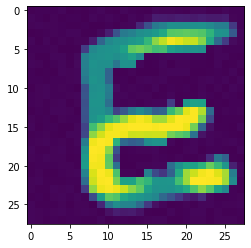

In [214]:
# horizontal shift to left 
transform = AffineTransform(translation = (-3,0))
warp_img = warp(sample, transform, mode = "wrap")
plt.imshow(warp_img)

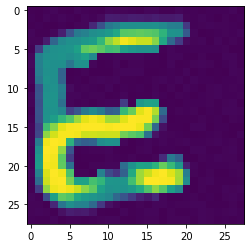

In [215]:
# horizontal shift to right 
transform = AffineTransform(translation = (3,0))
warp_img = warp(sample, transform, mode = "wrap")
plt.imshow(warp_img)

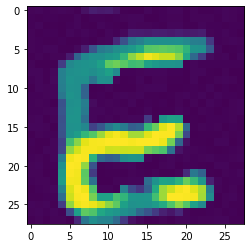

In [219]:
# vertical shift down 
transform = AffineTransform(translation = (0,-2))
warp_img = warp(sample, transform, mode = "wrap")
plt.imshow(warp_img)

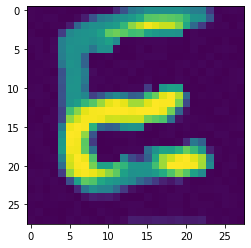

In [218]:
# vertical shift up 
transform = AffineTransform(translation = (0,2))
warp_img = warp(sample, transform, mode = "wrap")
plt.imshow(warp_img)

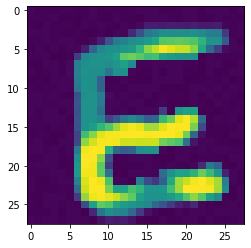

In [248]:
# random shift 
dx = random.choice([-2,-1,1,2])
dy = random.choice([-2,-1,1,2])
transform = AffineTransform(translation = (dx,dy))
warp_img = warp(sample, transform, mode = "wrap")
plt.imshow(warp_img)

# other possible augmentations 

we could also consider zooming, shearing (affine transform), zca_whitening, etc but we are not so sure if they will help or harm training. Some augmentations may distort data too much and could harm performance